<a href="https://colab.research.google.com/github/akitim/SkillFactory_current/blob/main/MATH%26ML_6_%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_%D0%9E%D0%BF%D1%82%D0%B8%D0%BC%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_%D0%90%D0%BA%D0%B8%D0%BC%D0%BA%D0%B8%D0%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.**

In [94]:
import numpy as np
import pandas as pd

path = 'https://raw.githubusercontent.com/akitim/datasets/main/Advertising.csv'
# path = '/content/Advertising.csv'
data = pd.read_csv(path, index_col=0)
data.sample(5)

,TV,radio,newspaper,sales
13,23.8,35.1,65.9,9.2
66,69.0,9.3,0.9,9.3
81,76.4,26.7,22.3,11.8
122,18.8,21.7,50.4,7.0
187,139.5,2.1,26.6,10.3


**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [95]:
print('Количество пропусков в признаках:')
data.isna().sum(axis=0)

Количество пропусков в признаках:


TV           0
radio        0
newspaper    0
sales        0
dtype: int64

**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)**

In [96]:
target = 'sales'
y = data[target].values
X = data.drop(target, axis=1).values

## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [97]:
import numpy as np

X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
y = y.reshape(-1, 1)
print(X.shape, y.shape)

(200, 4) (200, 1)


**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [98]:
# X = X / np.sqrt(np.sum(np.square(X), axis=0))
X = X / np.linalg.norm(X, axis=0)

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм координатного спуска для случая нормализованных данных:

**Задано:**

* $X=(x_{ij})$ - матрица наблюдений, размерностью $dim(X)=(n, m)$
* $N=1000$ - количество итераций

**Примечание:** *1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.*

**Алгоритм (математическая запись):**
* Создать нулевой вектор параметров $w_0=(0, 0,..., 0)^T$
* Для всех $t=1, 2, ..., N$ итераций:
    * Для всех $k = 1, 2,..., m$:
        * Фиксируем значение всех признаков, кроме $k$-ого и вычисляем прогноз модели линейной регрессии.Для этого исключаем признак $k$-ый из данных и $w_j$ из параметров при построении прогноза.
        Математически это можно записать следующим образом:

        $$h_i = \sum_{j=1}^{k-1} x_{ij}w_{j} + \sum_{j=k+1}^{m} x_{ij}w_j $$

        **Примечание:**
        
        *Обратите, что в данной записи текущий признак под номером $k$ не участвует в сумме.Сравните эту запись с классической записью прогноза линейной регрессии в случае нормированных данных (когда участвуют все признаки):*

        $$h_i = \sum_{j=1}^{m} x_{ij}w_{j}$$
        
        * Вычисляем новое значение параметра $k$-ого коэффициента:
        $$w_k = \sum_{i=1}^{n} x_{ik} (y_i - h_i) = x_k^T(y-h) $$

    * Вычисляем значение функции потерь и сохраняем в историю изменения функции потерь (В оценке функции потерь участвуют все признаки):
        $$\hat{y_i} = \sum_{j=1}^{m}x_{ij}w_j$$
        $$Loss_t = \frac{1}{n} \sum_{i=1}^{n}(y_i-\hat{y_i})^2$$
        
        или в векторном виде:
        
        $$\hat{y} = Xw$$
        $$Loss_t = \frac{1}{n}(y-\hat{y})^T(y-\hat{y})$$
    



**Алгоритм (псевдокод):**
```python

num_iters = #количество итераций
m = # количество строк в матрице X
n = # количество столбцов в матрице X
w = #вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum((X @ w) - y) ** 2)/(len(y))

```

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

Коэффициенты модели c линейным поиском: 41.56240032 110.13144261 73.52847783 -0.55015691
Коэффициенты модели с аналитической оптимизацией: 41.56217206 110.13144155 73.52860637 -0.55006385


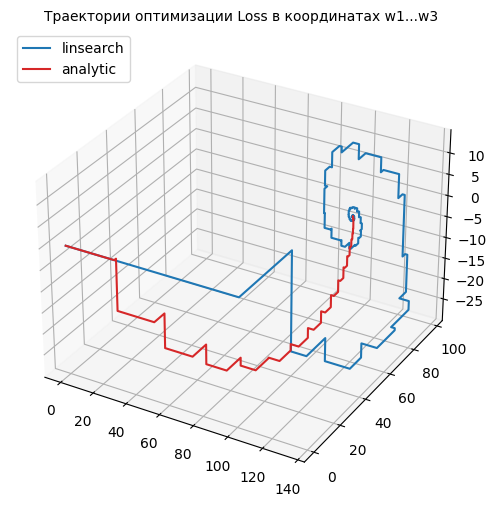

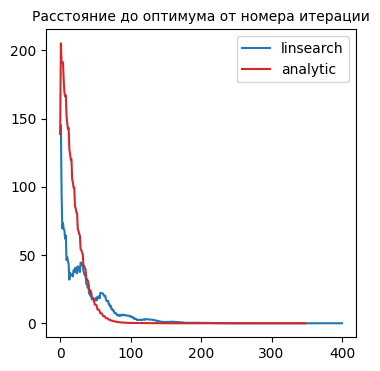

In [99]:
import numpy as np
import matplotlib.pyplot as plt

class CustomLinearRegression:
    # класс для реализации линейной регрессии; коэф. регрессии находятся
    # методом координатного спуска

    def __init__(self, solver='CD_linsearch',
                 fit_intercept=False, max_iter=100, tol=1e-5):
        self.solver = solver
        self.fit_intercept = fit_intercept
        self.max_iter = max_iter
        self.tolerance = tol
        self.status = 'Not fitted!' #статус завершения оптимизации
        self._intercept = None
        self.coef_ = None
        self.Ls = None #массив зн-й Loss для каждой итерации
        self.trajectory = None #массив весов для каждой итерации
        self.nit = None #кол-во итераций до завершения метода
        self.__fitted = False


    def _CD_linsearch(self, X, y, w_0=None):
    #координатный спуск с минимизацией линейным поиском по каждой координате

        if self.fit_intercept:
            ones = np.ones(shape=(X.shape[0], 1))
            X = np.hstack(ones, X)

        n, m = X.shape
        w = w_0.copy() if w_0 is not None else np.zeros(shape=(1, m))
        # w = w.reshape((-1, 1)) # для матричных операций

        # функция потерь
        def Loss(w, X, y):
            n = y.size
            return (1 / n * (X @ w.T - y).T @ (X @ w.T - y))[0, 0]

        L_curr = Loss(w, X, y)
        status = ''
        Ls = [L_curr]
        coords = [w.copy()[0]]
        for i in range(self.max_iter):
            for k in range(m):
            # линейный поиск минимума в напр. w_k: делаем "большой" шаг в обе
            # стороны от т. w_0_k,чтобы гарантированно попасть в направление
            # убывания Loss смотрим, уменьшилась ли Loss-ф-ции в новых точках;
            # если да, переходим в т. с наименьшим зн-ем Loss, нет -
            # уменьшаем шаг в 1 / phi раз, снова смотрим Loss в новых точках

                step = 101 # шаг линейного поиска
                phi = 0.61803398875 # коэф. уменьшения шага линейного поиска
                cond = False
                while not cond:
                    # 'большой' шаг в обе стороны по коорд. w_k,

                    w_k_plus, w_k_minus = w[0, k] + step, w[0, k] - step

                    # вычисляем Loss
                    w_k_curr = w[0, k]
                    w[0, k] = w_k_plus
                    L_plus = Loss(w, X, y)
                    w[0, k] = w_k_minus
                    L_minus = Loss(w, X, y)
                    w[0, k] = w_k_curr

                    #удалось ли хотя бы на одном из отр. и пол. шагов уменьшить Loss
                    cond = L_curr >= L_plus or L_curr >= L_minus

                    #если удалось
                    if cond:
                        w[0, k] = [w_k_minus, w_k_plus][np.argmin([L_minus,
                                                                   L_plus])]
                        L_curr = np.min([L_minus, L_plus])
                        coords += [w.copy()[0]]

                    step *= phi

                Ls += [L_curr]

            if np.linalg.norm(coords[-2] - coords[-1]) <= self.tolerance:
                status = 'Success'
                break

            if i == self.max_iter - 1:
                status = 'Max_iter reached!'

        return {'status': status, 'weights': w[0], 'Ls': Ls,
                'trajectory': coords, 'nit': i + 1}

    def _CD_analytic(self, X, y, w_0=None):

        #координатный спуск с аналитической оптимизацией  по каждой координате
        if self.fit_intercept:
            ones = np.ones(shape=(X.shape[0], 1))
            X = np.hstack(ones, X)

        n, m = X.shape
        w = w_0.copy() if w_0 is not None else np.zeros(shape=(1, m))
        # w = w.reshape((-1, 1)) # для матричных операций

        # функция потерь
        def Loss(w, X, y):
            n = y.size
            return (1 / n * (X @ w.T - y).T @ (X @ w.T - y))[0, 0]

        L_curr = Loss(w, X, y)
        status = ''
        Ls = [L_curr]
        coords = [w.copy()[0]] #sic!

        for i in range(self.max_iter):
            for k in range(m):
                w[0, k] = 0
                w[0, k] = - X[:, [k]].T @ (X @ w.T - y)

                coords += [w.copy()[0]] #sic!
                L_curr = Loss(w, X, y)
                Ls += [L_curr]

            if np.linalg.norm(coords[-2] - coords[-1]) <= self.tolerance:
                status = 'Success'
                break

            if i == self.max_iter - 1:
                status = 'Max_iter reached!'

        return {'status': status, 'weights': w[0], 'Ls': Ls,
                'trajectory': coords, 'nit': (i + 1) * m}

    def fit(self, X, y, w_0=None):
        # фиттинг модели

        if self.solver == 'CD_linsearch':
            res = self._CD_linsearch(X, y, w_0)
        elif self.solver == 'CD_analytic':
            res = self._CD_analytic(X, y, w_0)

        self.status = res['status']
        if self.fit_intercept:
            self._intercept = res['weights'][0]
            self.coef_ = res['weights'][1:]
        else:
            self._intercept = 0
            self.coef_ = res['weights']

        self.Ls = res['Ls']
        self.trajectory = res['trajectory']
        self.nit = res['nit']

        self.__fitted = True
        return None

    def predict(self, X):
        # вычисляет предсказание модели

        if self.__fitted:
            if self.fit_intercept:
                ones = np.ones(shape=(X.shape[0], 1))
                X_ = np.hstack(ones, X)
                w = np.hstack([self._intercept, self.coef_]).reshape((1, -1))
            else:
                X_ = X.copy()
                w = self.coef_.reshape((1, -1))
            return X_ @ w.T
        else:
            print ("Object should be fitted first!")
            return None

# ==============================================================================
# ==============================================================================
# ==============================================================================
# def coord_descent_linsearch(X, y, w_0=None, max_iter=100, tol=1e-5):
#     #координатный спуск с минимизацией линейным поиском по каждой координате

#     n, m = X.shape
#     w = w_0.copy() if w_0 is not None else np.zeros(shape=(1, m))
#     # w = w.reshape((-1, 1)) # для матричных операций

#     # функция потерь
#     def Loss(w, X, y):
#         n = y.size
#         return (1 / n * (X @ w.T - y).T @ (X @ w.T - y))[0, 0]

#     L_curr = Loss(w, X, y)
#     status = ''
#     Ls = [L_curr]
#     coords = [w.copy()[0]]
#     for i in range(max_iter):
#         for k in range(m):
#             # линейный поиск минимума в напр. w_k: делаем "большой" шаг в обе
#             # стороны от т. w_0_k,чтобы гарантированно попасть в направление
#             # убывания Loss смотрим, уменьшилась ли Loss-ф-ции в новых точках;
#             # если да, переходим в т. с наименьшим зн-ем Loss, нет -
#             # уменьшаем шаг в 1 / phi раз, снова смотрим Loss в новых точках

#             step = 101 # шаг линейного поиска
#             phi = 0.61803398875 # коэф. уменьшения шага линейного поиска
#             cond = False
#             while not cond:
#                 # 'большой' шаг в обе стороны по коорд. w_k,

#                 w_k_plus, w_k_minus = w[0, k] + step, w[0, k] - step

#                 # вычисляем Loss
#                 w_k_curr = w[0, k]
#                 w[0, k] = w_k_plus
#                 L_plus = Loss(w, X, y)
#                 w[0, k] = w_k_minus
#                 L_minus = Loss(w, X, y)
#                 w[0, k] = w_k_curr

#                 #debug
#                 # print('i, k=', i, k)
#                 # print('L_curr=', L_curr)
#                 # print('L_plus=', L_plus)
#                 # print('L_minus=', L_minus)
#                 # print('step=', step)

#                 #удалось ли хотя бы на одном из отр. и пол. шагов уменьшить Loss
#                 cond = L_curr >= L_plus or L_curr >= L_minus

#                 #если удалось
#                 if cond:
#                     w[0, k] = [w_k_minus, w_k_plus][np.argmin([L_minus, L_plus])]
#                     L_curr = np.min([L_minus, L_plus])
#                     coords += [w.copy()[0]]

#                 step *= phi

#                 # if step <= 1e-6: break
#             Ls += [L_curr]

#         # if np.linalg.norm(coords[-2] - coords[-1]) <= tol:
#         if Ls[-2] - Ls[-1] <= tol:
#             status = 'Success'
#             break

#         if i == max_iter - 1:
#             status = 'Max_iter reached!'

#     return {'status': status, 'weights': w[0], 'Ls': Ls, 'trajectory': coords,
#             'nit': i + 1}

# # ==============================================================================
# # ==============================================================================
# def coord_descent_analytic(X, y, fit_intercept=False,
#                            w_0=None, max_iter=100, tol=1e-5):

#     #координатный спуск с оптимизацией линейным поиском по каждой координате
#     if fit_intercept:
#         ones = np.ones(shape=(X.shape[0], 1))
#         X = np.hstack(ones, X)

#     n, m = X.shape
#     w = w_0.copy() if w_0 is not None else np.zeros(shape=(1, m))
#     # w = w.reshape((-1, 1)) # для матричных операций

#     # функция потерь
#     def Loss(w, X, y):
#         n = y.size
#         return (1 / n * (X @ w.T - y).T @ (X @ w.T - y))[0, 0]

#     L_curr = Loss(w, X, y)
#     status = ''
#     Ls = [L_curr]
#     # print(w)
#     coords = [w.copy()[0]] #sic!
#     # coords.append(w)
#     # print('coords init: ', coords)
#     for i in range(max_iter):
#         for k in range(m):
#             w[0, k] = 0
#             # w[0, k] = -2 * X[:, [k]].T @ (X @ w.T - y) / np.sum(X[:, k])
#             w[0, k] = - X[:, [k]].T @ (X @ w.T - y)

#             # print('coords before:', coords)
#             coords += [w.copy()[0]] #sic!
#             # print('coords after:', coords, '\n')
#             L_curr = Loss(w, X, y)
#             Ls += [L_curr]

#         if Ls[-2] - Ls[-1] <= tol:
#             status = 'Success'
#             break

#         if i == max_iter - 1:
#             status = 'Max_iter reached!'

#     return {'status': status, 'weights': w[0], 'Ls': Ls,
#             'trajectory': coords, 'nit': (i + 1) * m}

# ==============================================================================
# ==============================================================================

# находим коэффициенты регрессии
w_0 = np.zeros(shape=(1, X.shape[1]))
linreg_ls = CustomLinearRegression(solver='CD_linsearch', fit_intercept=False,
                                   max_iter=100, tol=1e-10)
linreg_an = CustomLinearRegression(solver='CD_analytic', fit_intercept=False,
                                   max_iter=100, tol=1e-10)
linreg_ls.fit(X, y)
linreg_an.fit(X, y)

print ('Коэффициенты модели c линейным поиском:',
       *np.round(linreg_ls.coef_, 8))
print ('Коэффициенты модели с аналитической оптимизацией:',
       *np.round(linreg_an.coef_, 8))

# ==============================================================================
# Небольшая визуализация сходимости 2 методов
# ==============================================================================
trajectory_1 = np.asarray(linreg_ls.trajectory)
trajectory_2 = np.asarray(linreg_an.trajectory)

u1 = trajectory_1[:, 1]
v1 = trajectory_1[:, 2]
z1 = trajectory_1[:, 3]

u2 = trajectory_2[:, 1]
v2 = trajectory_2[:, 2]
z2 = trajectory_2[:, 3]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6),
                        subplot_kw={'projection':'3d'})
ax.set_title('Траектории оптимизации Loss в координатах w1...w3',
                size=10)

ax.plot(u1, v1, z1, 'C0-', label='linsearch');
ax.plot(u2, v2, z2, 'C3-', label='analytic');
plt.legend(loc='upper left');

def rho(x1, x2):
    return ((x1 - x2) @ (x1 - x2))**0.5

optimum = linreg_ls.coef_

r1 = [rho(optimum, x) for x in trajectory_1]
r2 = [rho(optimum, x) for x in trajectory_2]
n1 = np.arange(0, len(r1))
n2 = np.arange(0, len(r2))

fig_, ax_ = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
ax_.set_title('Расстояние до оптимума от номера итерации', size=10)
ax_.plot(n1, r1, 'C0-', label='linsearch');
ax_.plot(n2, r2, 'C3-', label='analytic');
plt.legend(loc='upper right');

Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False)
model.fit(X, y)

print(model.coef_)

[[ 41.56217205 110.13144155  73.52860638  -0.55006384]]


Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [1]:
import numpy as np
import pandas as pd

path = 'https://raw.githubusercontent.com/akitim/datasets/main/Advertising.csv'
data = pd.read_csv(path, index_col=0)
target = 'sales'
y = data[target].values
X = data.drop(target, axis=1).values

X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

**Добавим единичный столбец**

In [2]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [3]:
def mse_error(y_true, y_pred):
    y_true_ = y_true.reshape((-1, 1))
    n = y_true.size
    return 1 / n * ((y_true_ - y_pred).T @ (y_true_ - y_pred))[0, 0]


**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [4]:
y_naive = np.mean(y)
mse_error(y, y_naive)


27.085743749999992

**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [5]:
def lin_pred(X, w):
    return X @ w.copy().reshape(-1, 1)


**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла)
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [7]:
def stoch_grad_step(X, y, w, train_ind, eta):
    X_train = X[train_ind, :]
    y_train = y[train_ind].reshape(1, -1)
    w_ = np.asarray(w.copy()).reshape(1, -1)

    mini_batch_size = train_ind.size
    delta_w_ =  - 2 * eta / mini_batch_size \
    * (w_ @ X_train.T - y_train) \
    @ X_train

    return w_ + delta_w_


**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [84]:
def stochastic_gradient_descent(X, y, w_0=None, eta=5, mini_batch_size=100,
                                fit_intercept=False, max_iter=100, tol=1e-5):

    if fit_intercept:
        ones = np.ones(shape=(X.shape[0], 1))
        X = np.hstack(ones, X)

    n, m = X.shape
    w = w_0.copy() if w_0 is not None else np.zeros(shape=(1, m))
    # w = w.reshape((-1, 1)) # для матричных операций

    errors = [mse_error(y, lin_pred(X, w))]
    coords = [w.copy()[0]]
    status = ''

    for i in range(max_iter):
        # генерируем случайные индексы для mini-batch
        train_ind = np.random.randint(0, n, size = mini_batch_size)
        w = stoch_grad_step(X, y, w, train_ind, eta)

        errors += [mse_error(y, lin_pred(X, w))]
        coords += [w.copy()[0]]

        if np.linalg.norm(coords[-1] - coords[-2]) <= tol:
            status = 'Success'
            break

        if i == max_iter - 1:
            status = 'Max_iter reached!'

    return {'status': status, 'weights': w[0], 'mses': errors,
            'trajectory': coords, 'nit': i + 1}

w_0 = [0, 0, 0, 0]
res_sgd = stochastic_gradient_descent(
    X, y, w_0=None, eta=0.01, mini_batch_size=1,
    fit_intercept=False, max_iter=1e5, tol=1e-6
    )
res_sgd['status'], res_sgd['weights'], res_sgd['nit']


('Max_iter reached!',
 array([14.04580492,  3.99416214,  2.66836739,  0.02434562]),
 100000)

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

**Постройте график зависимости ошибки от номера итерации**

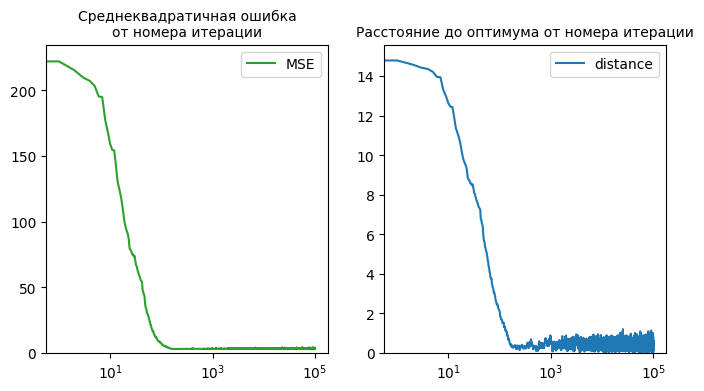

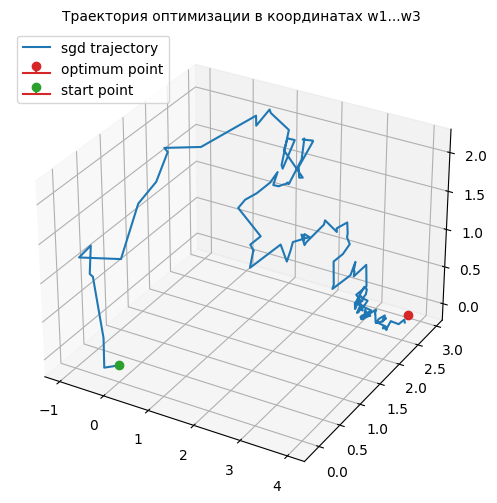

In [93]:
import matplotlib.pyplot as plt

trajectory = np.asarray(res_sgd['trajectory'])
mses = res_sgd['mses']
optimum = res_sgd['weights']

def rho(x1, x2):
    #евклидово расстояние между двумя векторами
    return ((x1 - x2) @ (x1 - x2))**0.5

r = [rho(optimum, x) for x in trajectory]
n = np.arange(0, len(r))

fig_, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

axs[0].set_title('Среднеквадратичная ошибка\nот номера итерации', size=10)
axs[0].set_xscale('log'); #чтобы лучше различить начало графика
axs[0].set_ylim([0, 1.05*np.max(mses)]);
axs[0].plot(np.arange(0, len(mses)), mses, 'C2-', label='MSE');
axs[0].legend(loc='upper right');

axs[1].set_title('Расстояние до оптимума от номера итерации', size=10)
axs[1].set_xscale('log'); #чтобы лучше показать начало графика
axs[1].set_ylim([0, 1.05*np.max(r)]);
axs[1].plot(n, r, 'C0-', label='distance');
axs[1].legend(loc='upper right');

# для лучшей читаемости графика траектории схождения алгоритма
# берем только первые 150 итераций
u1 = trajectory[:150, 1]
v1 = trajectory[:150, 2]
z1 = trajectory[:150, 3]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6),
                        subplot_kw={'projection':'3d'})
ax.set_title('Траектория оптимизации в координатах w1...w3',
                size=10)

ax.plot(u1, v1, z1, 'C0-', label='sgd trajectory');
ax.stem([optimum[1]], [optimum[2]], [optimum[3]],
        linefmt='C3-', markerfmt='C3o', label='optimum point', bottom=0);
ax.stem([trajectory[0, 1]], [trajectory[0, 2]], [trajectory[0, 3]],
        linefmt='C2-', markerfmt='C2o', label='start point', bottom=0);
ax.legend(loc='upper left');

**Выведите вектор весов, к которому сошелся метод.**

In [91]:
res_sgd['weights']

array([14.04580492,  3.99416214,  2.66836739,  0.02434562])

**Выведите среднеквадратичную ошибку на последней итерации.**

In [92]:
res_sgd['mses'][-1]

2.8030544368512875